In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

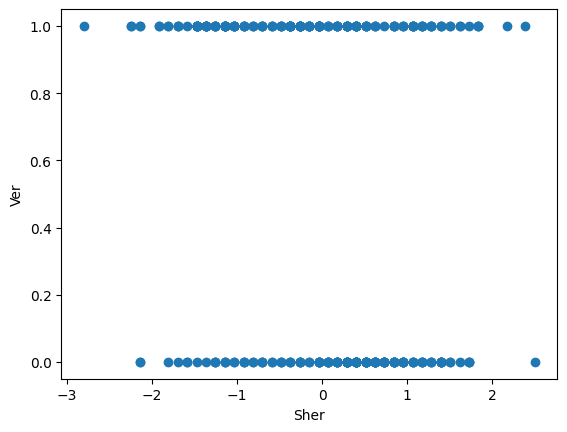

In [19]:
heart = pd.read_csv('csvTrainImages 60k x 784.csv')

# X = heart.drop('output', axis=1).values

# scaler = StandardScaler()
# scaler.fit(X)
# StandardScaler(copy=True, with_mean=True, with_std=True)

# X_scaled = scaler.fit_transform(X)

# X_age = X_scaled[:, 0].reshape(-1, 1)

# Y_alt = heart['output'].values
# Y = Y_alt.reshape(-1, 1)

# plt.scatter(X_age, Y)
# plt.xlabel('Sher')
# plt.ylabel('Ver')

# plt.show()

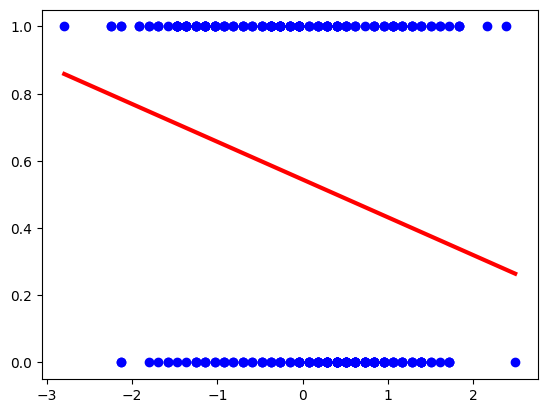

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_age, Y)
prediction_space = np.linspace(min(X_age), max(X_age)).reshape(-1,1)
plt.scatter(X_age, Y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'red', linewidth = 3)

plt.show()

In [21]:

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_alt, test_size = 0.2, random_state = 42)

reg_all = LinearRegression()
reg_all.fit(X_train, Y_train)

Y_pred = reg_all.predict(X_test)
reg_all.score(X_test, Y_test)

0.5337894947682487

In [22]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(reg, X_scaled, Y, cv = 5)
print(cv_results)

[0.        0.        0.3266887 0.        0.       ]


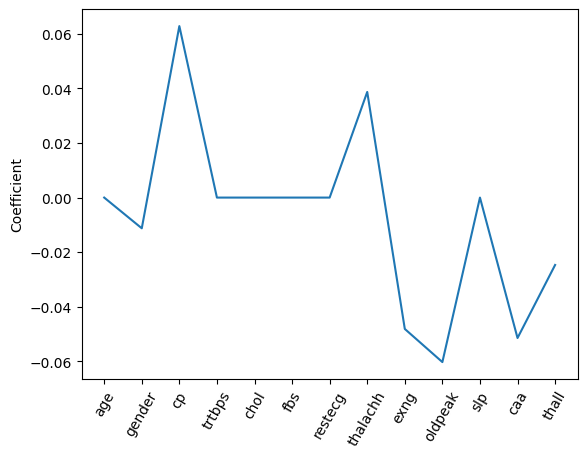

In [23]:
from sklearn.linear_model import Lasso

names = heart.drop('output', axis = 1).columns
lasso = Lasso(alpha = .1)

lasso_coef = lasso.fit(X_scaled, Y_alt).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficient')

plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
knn.score(X_test, Y_test)

0.9180327868852459

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, Y_pred), classification_report(Y_test, Y_pred), sep = '\n'*2)

[[27  2]
 [ 3 29]]

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)
log_reg.score(X_test, Y_test)

0.8524590163934426

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0] [0.07901777 0.65666004 0.84664029 0.0218504  0.96058393 0.90048195
 0.62905443 0.00148753 0.0050647  0.45079803 0.76731416 0.05487846
 0.90356594 0.03869327 0.99113879 0.9436335  0.98925739 0.08529113
 0.00626997 0.01103697 0.61973734 0.0112913  0.19648    0.77667797
 0.95651314 0.66871693 0.8861542  0.5141513  0.00749982 0.94616395
 0.03338587 0.02604688 0.00596302 0.08620463 0.77948576 0.05881097
 0.68807355 0.89062912 0.79404731 0.83469426 0.4922697  0.74279549
 0.84503916 0.71461175 0.84675309 0.00605982 0.78151559 0.95746202
 0.0960032  0.01657746 0.06619559 0.00792489 0.89573104 0.98279274
 0.16932589 0.00136647 0.03321694 0.96457431 0.01522271 0.0026209
 0.03858011]


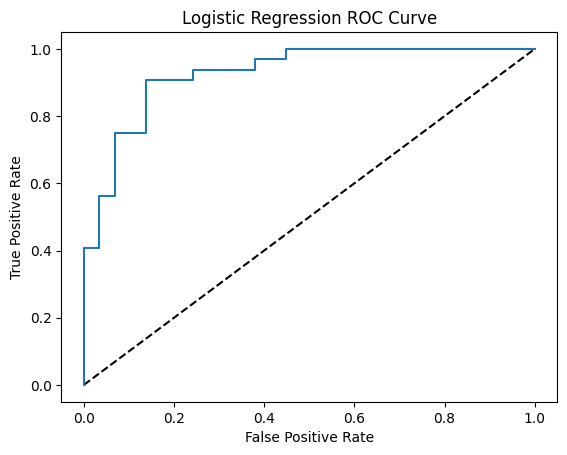

In [29]:
from cProfile import label
from sklearn.metrics import roc_curve

Y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

print((Y_test),(Y_pred_prob))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_pred_prob)

0.9267241379310345

In [13]:
cv_results = cross_val_score(log_reg, X_scaled, Y_alt, cv = 5, scoring = 'roc_auc')
print(cv_results)

[0.89502165 0.95562771 0.88311688 0.92817059 0.84511785]


In [14]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)
svc.score(X_test, Y_test)

0.8688524590163934

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state = 0)

dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

accuracy_score(Y_test, Y_pred)


0.819672131147541

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_alt, test_size = 0.2, random_state = 0)

dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 3)

dtr.fit(X_train, Y_train)
Y_pred = dtr.predict(X_test)

mse_dtr = MSE(Y_test, Y_pred)
rmse_dtr = mse_dtr**(1/2)

print(rmse_dtr )

0.4066100390818801


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = .12, random_state = 0)

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

rmse_dtr = MSE(Y_test, Y_pred)**(1/2)

print(f'{rmse_dtr:.2f}')

0.38
